# Importing Libraries

In [1]:
import torch
import torch.nn as nn
from torchvision import datasets 
from torchvision.datasets import MNIST
from torchvision import transforms
from torchvision.transforms import ToTensor
import numpy as np 
from matplotlib import pyplot as plt
import torch.nn.functional as F
import torch.optim as optim

# Loading in MNIST Dataset

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,))
])

train_data = MNIST(root='C:\\Users\\Kartik Mehta\\Documents\\torch\\data', train=True, download=True, transform=transform)
test_data = MNIST(root='C:\\Users\\Kartik Mehta\\Documents\\torch\\data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

for batch in train_loader:
    X, y = batch
    print("Shape of X:", X.shape)
    print("Shape of Y:", y.shape)
    break

for test_batch in test_loader:
    X_test, y_test = test_batch
    print("Shape of X Test:", X_test.shape)
    print("Shape of Y Test:", y_test.shape)
    break

Shape of X: torch.Size([64, 1, 28, 28])
Shape of Y: torch.Size([64])
Shape of X Test: torch.Size([64, 1, 28, 28])
Shape of Y Test: torch.Size([64])


# Looking at Data Features

In [3]:
print(f'Training Data: {train_data}')
print('\n----------------------------------------')
print(f'\nTesting Data: {test_data}')

Training Data: Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\Kartik Mehta\Documents\torch\data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

----------------------------------------

Testing Data: Dataset MNIST
    Number of datapoints: 10000
    Root location: C:\Users\Kartik Mehta\Documents\torch\data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [4]:
print(f'Training Data Shape: {train_data.data.shape}')
print(f'Testing Data Shape: {test_data.data.shape}')

Training Data Shape: torch.Size([60000, 28, 28])
Testing Data Shape: torch.Size([10000, 28, 28])


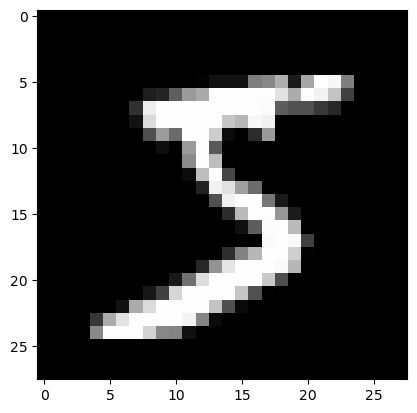

In [5]:
plt.imshow(train_data.data[0], cmap='gray')

# Building the Model

In [6]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        self.l1 = nn.Linear(784, 512)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.float()
        x = x.reshape((-1, 28**2))
        x = self.l2(self.relu(self.l1(x)))
        return x.squeeze()

# Training the Model

In [7]:
net = DigitClassifier()

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epochs = 5

for i in range(epochs):
    net.train()
    correct = 0
    total = 0
    for number, label in train_loader:
        optimizer.zero_grad()
        out = net(number)
        _, predicted = torch.max(out, 1)
        correct += (predicted == label).sum().item()
        total += label.size(0)
        loss = loss_func(out, label) 
        loss.backward()
        optimizer.step()

    accuracy = correct / total 
    print(f"Epoch: {i + 1}\n    Accuracy: {accuracy}")


Epoch: 1
    Accuracy: 0.9063333333333333
Epoch: 2
    Accuracy: 0.9565666666666667
Epoch: 3
    Accuracy: 0.9677666666666667
Epoch: 4
    Accuracy: 0.9732166666666666
Epoch: 5
    Accuracy: 0.9766166666666667


In [17]:
torch.save(net.state_dict(), "FFC_state_dict.pth")

# Model Evaluation 

In [9]:
model = torch.load(f="FFC")
model.eval()

correct = 0
total = 0


with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print('Accuracy: {:.2f}%'.format(accuracy))

Accuracy: 97.41%


# Passing Individual Images

Predicted class: 7


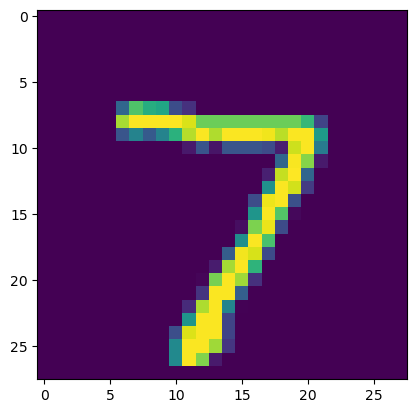

In [26]:
img = 0

with torch.no_grad():
    outputs = model(X_test[img])
    # Process predictions
    _, predicted = torch.max(outputs, -1)

print("Predicted class:", predicted.item())
plt.imshow(X_test.data[img].view(28, 28))